In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/Kuliah/semester 4/analisis runtun waktu/Data_Mining/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Eksplorasi  

##### a. Jumlah total penumpang

In [3]:
total_penumpang = df.shape[0]
print(f"Jumlah total penumpang: {total_penumpang}")

Jumlah total penumpang: 891


##### b. Jumlah penumpang yang selamat dan tidak selamat (Tabel & Grafik)

In [6]:
# Tabel
print("\nTabel:\n", df['Survived'].value_counts().rename(index={0:'Tidak Selamat', 1:'Selamat'}))


Tabel:
 Survived
Tidak Selamat    549
Selamat          342
Name: count, dtype: int64


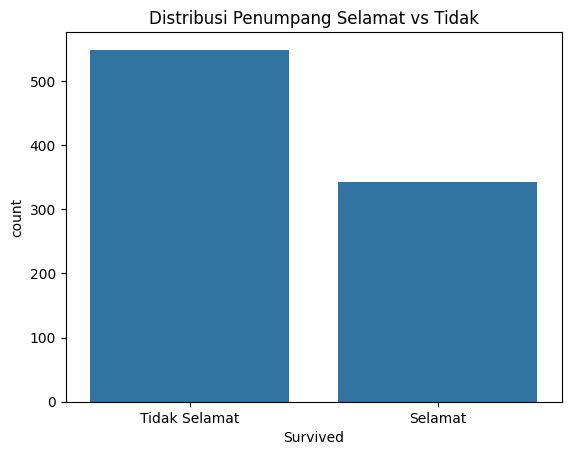

In [7]:
# Grafik
sns.countplot(data=df, x='Survived')
plt.xticks([0,1], ['Tidak Selamat', 'Selamat'])
plt.title('Distribusi Penumpang Selamat vs Tidak')
plt.show()

##### c. Rata-rata umur, penumpang termuda dan tertua

In [8]:
mean_age = df['Age'].mean()
min_age = df['Age'].min()
max_age = df['Age'].max()
youngest = df[df['Age'] == min_age]
oldest = df[df['Age'] == max_age]

print("\nRata-rata umur:", mean_age)
print("Penumpang termuda:\n", youngest[['Name', 'Age']])
print("Penumpang tertua:\n", oldest[['Name', 'Age']])


Rata-rata umur: 29.69911764705882
Penumpang termuda:
                                 Name   Age
803  Thomas, Master. Assad Alexander  0.42
Penumpang tertua:
                                      Name   Age
630  Barkworth, Mr. Algernon Henry Wilson  80.0


##### d. Jumlah penumpang berdasarkan jenis kelamin

In [9]:
gender_counts = df['Sex'].value_counts()
print("\nJumlah penumpang berdasarkan jenis kelamin:\n", gender_counts)


Jumlah penumpang berdasarkan jenis kelamin:
 Sex
male      577
female    314
Name: count, dtype: int64


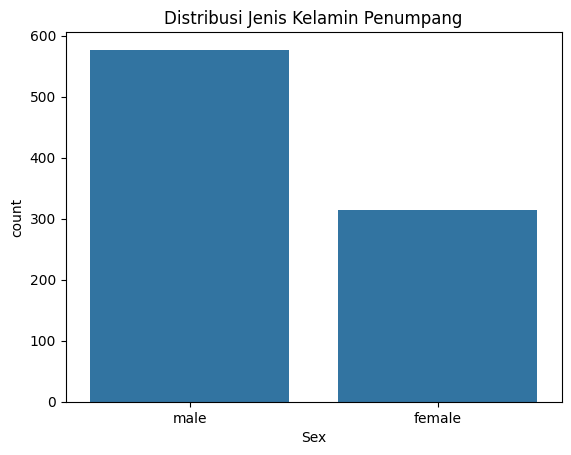

In [10]:
# Visualisasi
sns.countplot(data=df, x='Sex')
plt.title("Distribusi Jenis Kelamin Penumpang")
plt.show()

##### e. Jumlah berdasarkan kelas & persen kelas 1

In [11]:
class_counts = df['Pclass'].value_counts()
percent_class1 = (class_counts[1] / total_penumpang) * 100
print("\nJumlah penumpang berdasarkan kelas:\n", class_counts)
print(f"Persen kelas 1: {percent_class1:.2f}%")


Jumlah penumpang berdasarkan kelas:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Persen kelas 1: 24.24%


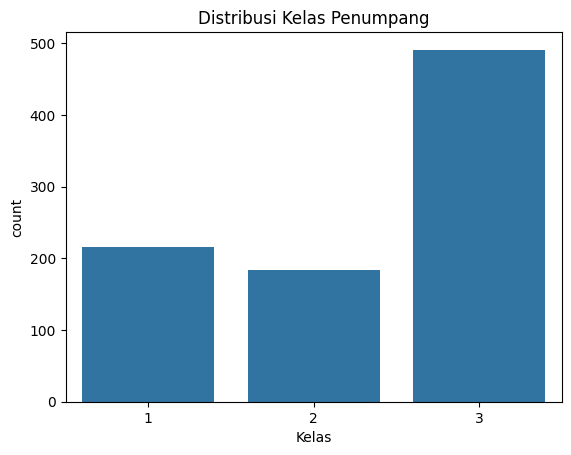

In [12]:
# Visualisasi
sns.countplot(data=df, x='Pclass')
plt.title("Distribusi Kelas Penumpang")
plt.xlabel("Kelas")
plt.show()

### 2. Preprocessing

##### a. Cek missing values

In [5]:
missing = df.isnull().sum()
print("\nMissing values:\n", missing)


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Berdasarkan hasil pengecekan, terdapat missing value pada beberapa kolom dalam dataset. Kolom Age memiliki 177 nilai yang hilang, Embarked sebanyak 2, dan Cabin paling banyak dengan 687 nilai kosong. Sementara kolom lainnya tidak memiliki missing value. Kondisi ini menunjukkan perlunya penanganan khusus agar data siap digunakan untuk analisis lebih lanjut.

##### b. Tangani missing value

Dalam proses pembersihan data Titanic, dilakukan tiga pendekatan berbeda untuk menangani missing value berdasarkan karakteristik masing-masing kolom:

1. Kolom "Age" diisi dengan median karena nilai umur termasuk data numerik yang sering kali memiliki outlier. Median dipilih karena lebih stabil dan tidak terpengaruh oleh nilai ekstrem, sehingga memberikan representasi yang lebih adil terhadap distribusi umur.

2. Kolom "Embarked" diisi dengan modus (mode) karena tipe datanya kategorikal. Modus adalah nilai yang paling sering muncul, sehingga secara logika paling masuk akal untuk digunakan sebagai nilai pengganti.

3. Kolom "Cabin" dihapus (drop) karena proporsi data kosongnya sangat besar. Jika tetap dipertahankan, kolom ini berpotensi menimbulkan bias atau noise pada model. Menghapus kolom yang terlalu banyak kosong lebih efisien dan tidak mengganggu kualitas data secara keseluruhan.

In [13]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)  # terlalu banyak kosong

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30116\2651696768.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30116\2651696768.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [14]:
# Cek jumlah missing value di setiap kolom
print("Jumlah missing value tiap kolom:")
print(df.isnull().sum())

# Cek jumlah baris dan kolom setelah perubahan
print("\nUkuran data sekarang (baris, kolom):")
print(df.shape)

Jumlah missing value tiap kolom:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Ukuran data sekarang (baris, kolom):
(891, 11)


##### c. Outlier detection
Outlier adalah nilai yang jauh berbeda dari data lainnya. Nilai ini bisa mengganggu analisis karena dapat memengaruhi hasil secara tidak wajar.

Pada dataset Titanic, outlier dicek khusus pada kolom Age karena usia memiliki rentang nilai yang luas dan bervariasi, sehingga berpotensi mengandung nilai ekstrem yang tidak wajar. Berbeda dengan kolom seperti Pclass, SibSp, dan Parch yang meskipun bertipe numerik, sebenarnya bersifat kategorikal dan memiliki rentang nilai terbatas. Oleh karena itu, Age menjadi kandidat paling relevan untuk pengecekan outlier guna menjaga akurasi model dan mencegah distorsi dalam analisis.

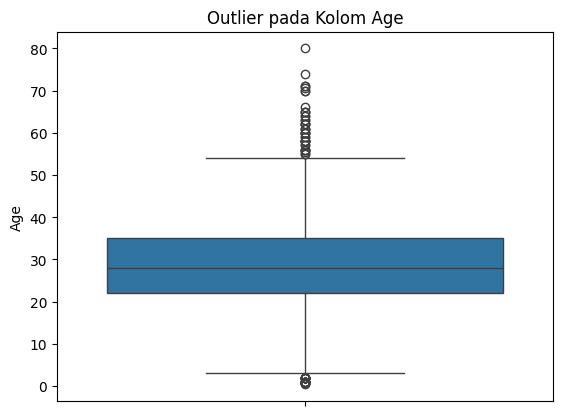

In [15]:
sns.boxplot(df['Age'])
plt.title("Outlier pada Kolom Age")
plt.show()

Terlihat adanya outlier pada data berdasarkan visualisasi boxplot, yaitu nilai-nilai yang berada di luar rentang antar kuartil (di atas Q3 atau di bawah Q1), yang ditandai dengan titik-titik di luar "whisker" pada plot tersebut.

In [16]:
# Menghitung IQR (Interquartile Range) untuk Age
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi outlier
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

print(f"Jumlah outlier pada Age: {len(outliers)}")
print(outliers[['Age']])


Jumlah outlier pada Age: 66
       Age
7     2.00
11   58.00
15   55.00
16    2.00
33   66.00
..     ...
827   1.00
829  62.00
831   0.83
851  74.00
879  56.00

[66 rows x 1 columns]


Pada kolom Age, terdeteksi adanya outlier, yang terlihat pada nilai sekitar 66 tahun.

##### d. Menghapus Outlier

Outlier pada kolom Age dapat memengaruhi kinerja algoritma klasifikasi yang sensitif terhadap nilai ekstrem, seperti KNN dan SVM. Oleh karena itu, outlier dihapus agar distribusi data menjadi lebih stabil dan model tidak bias terhadap data yang menyimpang. Penghapusan dilakukan dengan metode IQR, di mana data di luar batas bawah dan atas dianggap sebagai outlier.

In [18]:
# Menghapus outlier pada kolom 'Age'
df_cleaned = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
print(f"Jumlah data setelah menghapus outlier: {len(df_cleaned)}")

Jumlah data setelah menghapus outlier: 825


##### e. Standarisasi Fitur

Setelah menghapus outlier pada kolom Age, dilakukan standarisasi terhadap fitur numerik. Standarisasi dipilih karena beberapa algoritma klasifikasi sensitif terhadap skala data. Dengan standarisasi, setiap fitur akan memiliki rata-rata 0 dan standar deviasi 1, sehingga model bekerja lebih optimal dan seimbang dalam mempertimbangkan semua fitur.

In [19]:
from sklearn.preprocessing import StandardScaler

# 1. Pilih fitur yang akan digunakan
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

# 2. Encoding kolom kategorikal
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 3. Tangani missing value jika masih ada
X.fillna(0, inplace=True)

# 4. Scaling (standarisasi)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30116\3631465083.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30116\3631465083.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30116\3631465083.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

### 3. Modelling

##### a. Train-Test Split

Data dibagi menjadi dua bagian, yaitu data training dan data testing.
Data training digunakan untuk melatih model, sedangkan data testing digunakan untuk mengevaluasi performa model terhadap data baru.
Tujuannya adalah agar model tidak hanya hafal data, tetapi bisa menggeneralisasi ke data yang belum pernah dilihat sebelumnya.

In [20]:
from sklearn.model_selection import train_test_split

# Pembagian data 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

##### b. Proporsi Pembagian Data

Pembagian data menggunakan proporsi 80% data latih dan 20% data uji. Proporsi ini umum digunakan karena seimbang: data latih cukup besar untuk membangun model yang kuat, dan data uji cukup untuk evaluasi performa.

##### c. Pembuatan Tiga Model Klasifikasi

Untuk memprediksi kelangsungan hidup penumpang Titanic, digunakan tiga model klasifikasi berikut:

1. Logistic Regression: Model linier untuk klasifikasi biner. Memodelkan hubungan antara fitur dan probabilitas suatu kelas menggunakan fungsi logistik.

2. K-Nearest Neighbors (KNN): Mengklasifikasikan data berdasarkan tetangga terdekat. Setiap data diuji dengan mencari k titik pelatihan terdekat dan memberikan label mayoritas.

3. Decision Tree: Memisahkan data dengan serangkaian pertanyaan (ya/tidak) untuk membentuk pohon. Mudah diinterpretasi, namun rawan overfitting tanpa penyesuaian yang tepat.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [23]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [24]:
# Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

##### d.  Evaluasi Metrik Model

Model dievaluasi dengan accuracy, precision, recall, dan F1-score:

1. Accuracy: Persentase prediksi yang benar.

2. Precision: Dari semua yang diprediksi selamat, berapa yang benar.

3. Recall: Dari semua yang benar-benar selamat, berapa yang berhasil diprediksi.

4. F1-Score: Gabungan antara precision dan recall.

In [25]:
# Logistic Regression
from sklearn.metrics import classification_report

print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Model ini menghasilkan akurasi sebesar 80%. Precision-nya tinggi untuk kelas 0 (tidak selamat) yaitu 0.82, sedangkan untuk kelas 1 (selamat) adalah 0.77, menandakan prediksi cukup akurat. Recall-nya lebih tinggi untuk kelas 0 (0.85) dibanding kelas 1 (0.73), artinya model lebih sensitif dalam mendeteksi penumpang yang tidak selamat. F1-score untuk kelas 1 adalah 0.75, menunjukkan keseimbangan moderat antara precision dan recall.

In [33]:
# K-Nearest Neighbors (KNN)
print("KNN:\n", classification_report(y_test, y_pred_knn))

KNN:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



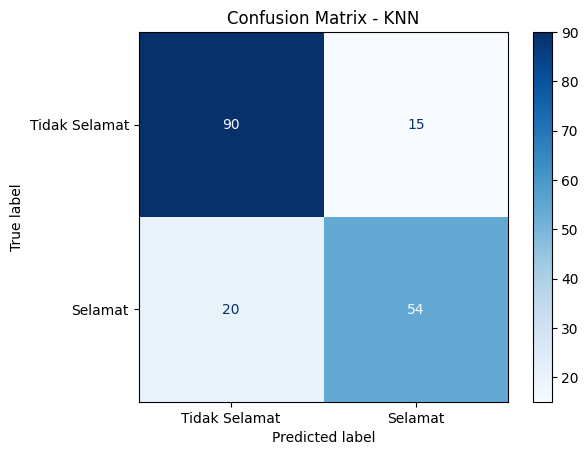

In [35]:
# Confusion Matrix for KNN
cm = confusion_matrix(y_test, y_pred_knn)
labels = ['Tidak Selamat', 'Selamat']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - KNN')
plt.show()

Model KNN juga meraih akurasi 80%. Precision untuk kelas 0 adalah 0.82, dan untuk kelas 1 adalah 0.78, menandakan ketepatan yang cukup seimbang. Recall kelas 0 lebih tinggi (0.86) dibanding kelas 1 (0.73), serupa dengan Logistic Regression. Namun, F1-score kelas 1 sebesar 0.76 sedikit lebih baik, mencerminkan keseimbangan yang lebih kuat.

In [27]:
# Decision Tree
print("Decision Tree:\n", classification_report(y_test, y_pred_tree))

Decision Tree:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Model Decision Tree menunjukkan performa yang cukup baik dengan akurasi sebesar 80%, hanya sedikit berbeda dibanding dua model lainnya. Untuk kelas 0 (tidak selamat), model ini mencatatkan precision 0.82 dan recall 0.84, sedangkan untuk kelas 1 (selamat), nilai precision-nya 0.76 dan recall-nya 0.74. Nilai f1-score untuk kelas 1 sebesar 0.75 menandakan bahwa model ini masih cukup stabil dalam memprediksi penumpang yang selamat

##### e. Model Terbaik 

Model terbaik dalam kasus ini adalah K-Nearest Neighbors (KNN). Pemilihan ini didasarkan pada hasil evaluasi model yang menunjukkan bahwa KNN memiliki kinerja paling seimbang dan efektif dalam mengklasifikasikan penumpang yang selamat (kelas 1), yang merupakan fokus utama dalam konteks penyelamatan. Meskipun semua model menghasilkan akurasi yang sama, yaitu 80%, KNN unggul dalam hal f1-score untuk kelas 1, yakni 0.76, yang merupakan nilai tertinggi dibanding Logistic Regression dan Decision Tree. Selain itu, nilai precision dan recall yang dihasilkan oleh KNN juga cukup stabil di kedua kelas, menunjukkan bahwa model ini tidak hanya tepat dalam memprediksi penumpang selamat, tetapi juga konsisten dalam mendeteksinya. Keseimbangan performa ini menjadikan KNN sebagai model yang paling optimal dari ketiga algoritma yang diuji.

### 4. Evaluasi

##### a. Precision dan Recall untuk Penumpang yang Selamat

Pada model terbaik, yaitu K-Nearest Neighbors (KNN), kita melihat performa klasifikasi untuk penumpang yang selamat (kelas 1). Dari classification report, nilai precision sebesar 0.78 menunjukkan bahwa dari seluruh penumpang yang diprediksi selamat, sebanyak 78% memang benar-benar selamat. Sementara itu, recall sebesar 0.73 mengindikasikan bahwa dari seluruh penumpang yang benar-benar selamat di data, sebanyak 73% berhasil dikenali dan diprediksi dengan tepat oleh model. Nilai-nilai ini menunjukkan bahwa model cukup baik dalam mengidentifikasi penumpang yang selamat, meskipun masih ada ruang untuk perbaikan.

##### b. Jumlah Penumpang yang Diprediksi Selamat dan Benar-benar Selamat

Berdasarkan hasil evaluasi model K-Nearest Neighbors (KNN), diketahui bahwa model memprediksi sebanyak 74 penumpang sebagai kategori selamat. Namun, setelah dibandingkan dengan data aktual, hanya 54 di antaranya yang benar-benar selamat, sedangkan sisanya sebanyak 20 penumpang ternyata tidak selamat meskipun diprediksi selamat oleh model. Hal ini menunjukkan bahwa dari seluruh prediksi selamat yang dilakukan oleh model, sebagian besar memang akurat, namun masih terdapat kesalahan klasifikasi yang perlu diperhatikan dalam upaya peningkatan performa model.